MNIST DIGIT RECOGNITION - CUSTOM IMAGE PREDICTOR

Attempting to load from TensorFlow/Keras...
Keras loading failed: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)

Falling back to alternative download source...

[1/5] Downloading MNIST dataset from GitHub mirror...
  Loading data into arrays...
✓ Training samples: 60000
✓ Test samples: 10000
✓ Data preprocessed and ready

[2/5] Building CNN model...
✓ Model architecture created

[3/5] Training model (this may take 2-5 minutes)...
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6554 - loss: 1.3537 - val_accuracy: 0.8890 - val_loss: 0.3895
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9015 - loss: 0.3295 - val_accuracy: 0.9253 - val_loss: 0.2531
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9280 - loss: 0.2389 - val_accuracy: 0.9371 - val_loss: 0.2135
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9439 - loss: 0.1881 - val_accuracy: 0.9533 - val_loss: 0.1609
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9535 - loss: 0.1560 - val_accuracy: 0.9591 - val_loss: 0.1329
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9603 - loss: 0.1330 - val_accuracy: 0.9651 - val_loss: 0.1149
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9653 - loss: 0.1171 - val_accuracy: 0.9695 - val_loss: 0.1013
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9692 - loss: 0.1047 - val_accuracy: 0.97


✓ Training complete!
✓ Test Accuracy: 97.69%

[4/5] Saving trained model...
✓ Model saved as 'digit_recognition_model.h5'

[5/5] Setting up custom image predictor...

✅ SETUP COMPLETE! Ready to predict custom digits!

📝 HOW TO USE:
------------------------------------------------------------
1. Save your digit image (PNG, JPG, etc.)
2. Use: predict_custom_digit('path/to/your/image.png')

💡 TIPS FOR BEST RESULTS:
   • Use clear, centered digits
   • Black or white background works best
   • Single digit per image
   • Higher resolution is better (will be resized to 28x28)

📌 EXAMPLE:
   predict_custom_digit('my_digit.png')
   predict_custom_digit('digit_5.jpg')
------------------------------------------------------------

🔍 DEMO: Testing with a sample from MNIST test set...
True label: 6

PREDICTING DIGIT FROM: digit.png

🎯 PREDICTED DIGIT: 6
📊 CONFIDENCE: 99.99%

Probability Distribution:
  0:  0.00%
  1:  0.00%
  2:  0.00%
  3:  0.00%
  4:  0.01%
  5:  0.00%
  6: ████████████████████

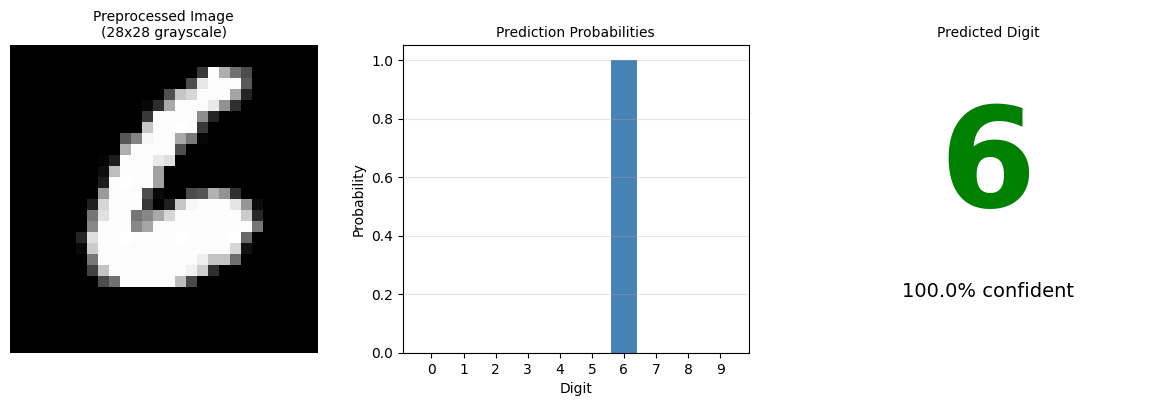


🎉 Ready to recognize your custom digit images!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #helps to process image particularly
import cv2 #openCV library ---> read and processing any sort of image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD #optimizer 
from tensorflow.keras.utils import to_categorical # data will be treated as categorical data
import os #deletion, creating of files 
import gzip #used for decompression of particuar dataset file 
import requests #download MNIST data 
from io import BytesIO #for handling bytes, data coming from internet through mnist data, to read that bytesIo is used

print("="*60)
print("MNIST DIGIT RECOGNITION - CUSTOM IMAGE PREDICTOR")
print("="*60)

def download_mnist_alternative(): #if keras failed
    print("\n[1/5] Downloading MNIST dataset from GitHub mirror...")
    
    base_url = "https://github.com/golbin/TensorFlow-MNIST/raw/master/mnist/data/"
    files = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }
    
    data_dir = 'mnist_data'
    os.makedirs(data_dir, exist_ok=True)#making a new folder
    
    for key, filename in files.items():
        filepath = os.path.join(data_dir, filename)
        if not os.path.exists(filepath):
            print(f"  Downloading {filename}...")
            try:
                response = requests.get(base_url + filename, timeout=30)
                response.raise_for_status()
                with open(filepath, 'wb') as f:
                    f.write(response.content)
                print(f"  ✓ {filename} downloaded")
            except Exception as e:
                print(f"  ❌ Failed to download {filename}: {e}")
                return None
    
    def load_images(filepath):
        with gzip.open(filepath, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28, 28)
    
    def load_labels(filepath):
        with gzip.open(filepath, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data
    
    print("  Loading data into arrays...")
    x_train = load_images(os.path.join(data_dir, files['train_images']))
    y_train = load_labels(os.path.join(data_dir, files['train_labels']))
    x_test = load_images(os.path.join(data_dir, files['test_images']))
    y_test = load_labels(os.path.join(data_dir, files['test_labels']))
    
    print(f"✓ Training samples: {x_train.shape[0]}")
    print(f"✓ Test samples: {x_test.shape[0]}")
    
    return (x_train, y_train), (x_test, y_test)

try:
    print("\nAttempting to load from TensorFlow/Keras...")
    from tensorflow.keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print("✓ Successfully loaded from Keras!")
except Exception as e:
    print(f"Keras loading failed: {e}")
    print("\nFalling back to alternative download source...")
    data = download_mnist_alternative()
    if data is None:
        print("\n❌ Could not download MNIST dataset. Please check your internet connection.")
        print("\n📥 MANUAL DOWNLOAD OPTION:")
        print("1. Download files from: https://github.com/golbin/TensorFlow-MNIST/tree/master/mnist/data")
        print("2. Place them in a 'mnist_data' folder in your working directory")
        print("3. Run this script again")
        exit(1)
    (x_train, y_train), (x_test, y_test) = data

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"✓ Data preprocessed and ready")

print("\n[2/5] Building CNN model...")
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)
print("✓ Model architecture created")

print("\n[3/5] Training model (this may take 2-5 minutes)...")
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✓ Training complete!")
print(f"✓ Test Accuracy: {test_accuracy*100:.2f}%")

print("\n[4/5] Saving trained model...")
model.save('digit_recognition_model.h5')
print("✓ Model saved as 'digit_recognition_model.h5'")

print("\n[5/5] Setting up custom image predictor...")

def preprocess_custom_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not read image from {image_path}")
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        
        if np.mean(resized) > 127:
            resized = 255 - resized
        
        normalized = resized.astype('float32') / 255.0
        processed = normalized.reshape(1, 28, 28, 1)
        
        return processed, resized
    
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None

def predict_custom_digit(image_path, show_visualization=True):
    print(f"\n{'='*60}")
    print(f"PREDICTING DIGIT FROM: {image_path}")
    print(f"{'='*60}")
    
    if not os.path.exists(image_path):
        print(f"❌ Error: File '{image_path}' not found!")
        return None, None
    
    processed_image, display_image = preprocess_custom_image(image_path)
    
    if processed_image is None:
        return None, None
    
    prediction = model.predict(processed_image, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    print(f"\n🎯 PREDICTED DIGIT: {predicted_digit}")
    print(f"📊 CONFIDENCE: {confidence:.2f}%")
    print(f"\nProbability Distribution:")
    for digit in range(10):
        prob = prediction[0][digit] * 100
        bar = '█' * int(prob / 2)
        print(f"  {digit}: {bar} {prob:.2f}%")
    
    if show_visualization:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        
        axes[0].imshow(display_image, cmap='gray')
        axes[0].set_title('Preprocessed Image\n(28x28 grayscale)', fontsize=10)
        axes[0].axis('off')
        
        axes[1].bar(range(10), prediction[0], color='steelblue')
        axes[1].set_xlabel('Digit')
        axes[1].set_ylabel('Probability')
        axes[1].set_title('Prediction Probabilities', fontsize=10)
        axes[1].set_xticks(range(10))
        axes[1].grid(axis='y', alpha=0.3)
        
        axes[2].text(0.5, 0.6, str(predicted_digit), 
                     fontsize=100, ha='center', va='center',
                     color='green' if confidence > 90 else 'orange',
                     weight='bold')
        axes[2].text(0.5, 0.2, f'{confidence:.1f}% confident', 
                     fontsize=14, ha='center', va='center')
        axes[2].set_xlim(0, 1)
        axes[2].set_ylim(0, 1)
        axes[2].axis('off')
        axes[2].set_title('Predicted Digit', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    
    return predicted_digit, confidence

print("\n" + "="*60)
print("✅ SETUP COMPLETE! Ready to predict custom digits!")
print("="*60)

print("\n📝 HOW TO USE:")
print("-" * 60)
print("1. Save your digit image (PNG, JPG, etc.)")
print("2. Use: predict_custom_digit('path/to/your/image.png')")
print("\n💡 TIPS FOR BEST RESULTS:")
print("   • Use clear, centered digits")
print("   • Black or white background works best")
print("   • Single digit per image")
print("   • Higher resolution is better (will be resized to 28x28)")
print("\n📌 EXAMPLE:")
print("   predict_custom_digit('my_digit.png')")
print("   predict_custom_digit('digit_5.jpg')")
print("-" * 60)

print("\n🔍 DEMO: Testing with a sample from MNIST test set...")
sample_idx = np.random.randint(0, len(x_test))
sample_image = x_test[sample_idx].reshape(28, 28)
sample_label = np.argmax(y_test[sample_idx])

temp_image = (sample_image * 255).astype(np.uint8)
cv2.imwrite('digit.png', temp_image)

print(f"True label: {sample_label}")
predict_custom_digit('digit.png', show_visualization=True)

if os.path.exists('digit.png'):
    os.remove('digit.png')

print("\n" + "="*60)
print("🎉 Ready to recognize your custom digit images!")
print("="*60)